In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
os.chdir(r'''D:\Coursera_ML\Final Project\Data''')


### 1. Загрузка Данных

In [2]:
april_2016=pd.read_csv(r'''yellow_tripdata_2016-06.csv''',engine='python')

In [ ]:
identifiers=pd.read_csv(r'''regions.csv''',engine='python',sep=';')

In [5]:
len(april_2016)

12210952

### 2. Очищение Данных

In [ ]:
%%time
april_2016_1=april_2016[april_2016['passenger_count']!=0]
april_2016_2=april_2016_1[april_2016_1['trip_distance']!=0]
april_2016_3=april_2016_2[april_2016_2['tpep_pickup_datetime']!=april_2016_2['tpep_dropoff_datetime']]
april_2016_4=april_2016_3[(april_2016_3['pickup_longitude'].between(-74.25559,-73.70001)) & (april_2016_3['pickup_latitude'].between(40.49612,40.91553))]

In [8]:
len(april_2016_4)

11968419

In [ ]:
april_2016_4['pickup_datehour']=april_2016_4['tpep_pickup_datetime'].apply(lambda x: x[:-5]+'00:00')

In [ ]:
april_2016_4.index=np.arange(0,len(april_2016_4),1)

### 3. Определение региона посадки

In [ ]:
april_2016_4_orderby_lon=april_2016_4.sort_values(by='pickup_longitude')

In [ ]:
arr=april_2016_4_orderby_lon['pickup_longitude'].values
east=identifiers['east'].unique()
april_2016_4_orderby_lon['x_sector']=0

In [ ]:
l=0
l1=0
for ind,val in enumerate(east):
    arr_supplementary=arr[l:]
    l1+=len(arr_supplementary[arr_supplementary<val])
    april_2016_4_orderby_lon['x_sector'][l:l1]=ind
    l+=len(arr_supplementary[arr_supplementary<val])

In [ ]:
april_2016_4_orderby_lat=april_2016_4_orderby_lon.sort_values(by='pickup_latitude')

In [ ]:
arr2=april_2016_4_orderby_lat['pickup_latitude'].values
north=identifiers['north'].unique()
april_2016_4_orderby_lat['y_sector']=0

In [ ]:
l=0
l1=0
for ind,val in enumerate(north):
    arr2_supplementary=arr2[l:]
    l1+=len(arr2_supplementary[arr2_supplementary<val])
    april_2016_4_orderby_lat['y_sector'][l:l1]=ind
    l+=len(arr2_supplementary[arr2_supplementary<val])
    

In [ ]:
april_2016_4_orderby_lat['region']=april_2016_4_orderby_lat['x_sector']*50+april_2016_4_orderby_lat['y_sector']+1

### 4. Группировка данных по часу и региону

In [ ]:
data_grouped=april_2016_4_orderby_lat.groupby(['pickup_datehour','region'])[['VendorID']].count().reset_index()
data_grouped.columns=['pickup_datehour','region','N_trips']

In [19]:
data_grouped.head()

,pickup_datehour,region,N_trips
0,2016-05-01 00:00:00,1015,1
1,2016-05-01 00:00:00,1017,1
2,2016-05-01 00:00:00,1029,3
3,2016-05-01 00:00:00,1030,1
4,2016-05-01 00:00:00,1033,4


In [29]:
Empire_State_Building_region=(east<-73.985428).argmin()*50+(north<40.748817).argmin()+1

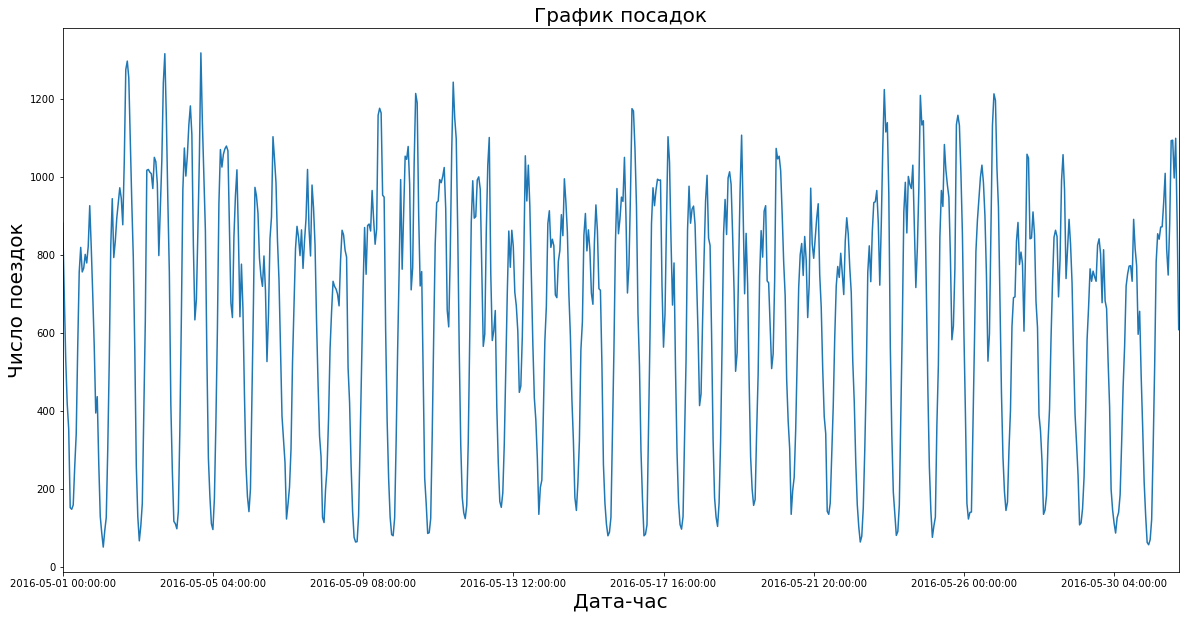

In [21]:
import matplotlib.pyplot as plt
Empire_State_info=data_grouped[data_grouped['region']==Empire_State_Building_region]
Empire_State_info.plot(x='pickup_datehour',y='N_trips',figsize=(20,10),legend=None)
plt.title('График посадок',fontsize=20)
plt.xlabel('Дата-час',fontsize=20)
plt.ylabel('Число поездок',fontsize=20)
plt.show()

In [22]:
print('Ни одной поездки не было совершено для {} пар час-ячейка.'.format(2500*24*31-len(data_grouped)))

Ни одной поездки не было совершено для 1718238 пар час-ячейка.


In [ ]:
data_grouped.to_excel(r'''Grouped_data_june.xlsx''')

In [17]:
april_2016_4.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_datehour
0,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.0,0.0,0.3,20.3,2016-01-01 00:00:00
1,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,2,26.0,0.5,0.5,0.0,0.0,0.3,27.3,2016-01-01 00:00:00
2,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3,2016-01-01 00:00:00
3,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.0,0.0,0.3,19.3,2016-01-01 00:00:00
4,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.0,0.0,0.3,12.8,2016-01-01 00:00:00
